In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator

In [7]:
source_path = r'./../Pertemuan 11/Villains/' 

In [8]:
datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range= .2,
    zoom_range= .2,
    horizontal_flip= True,
    rotation_range=30,
    validation_split=.05
)

In [13]:
train_generator = datagen.flow_from_directory(
    source_path,
    target_size=(150,300),
    batch_size=8,
    class_mode='categorical',
    shuffle=True
)

train_generator = datagen.flow_from_directory(
    source_path,
    target_size=(150,300),
    batch_size=8,
    class_mode='categorical',
    shuffle=True
)


Found 100 images belonging to 5 classes.


In [14]:
image, label = train_generator.next()

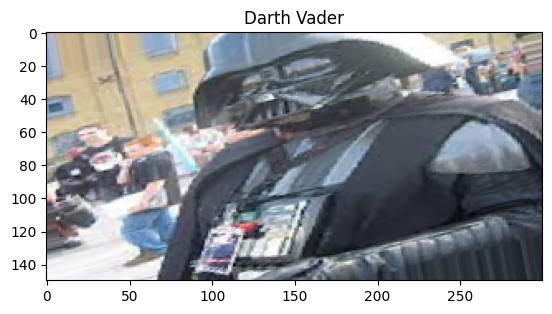

In [18]:
labels_name = ['Darth Vader', 'Green Goblin', 'Joker', 'Thanos', 'Venom']
plt.title(labels_name[tf.argmax(label[5])])
plt.imshow(image[5])

In [15]:
label

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2,4), activation='relu', input_shape=(150,300,3)),
    tf.keras.layers.MaxPooling2D(1,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(labels_name), activation='softmax')
])

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [21]:
history = model.fit(
    train_generator,
    epochs=25
)

Epoch 1/25
13/13 [==============================] - 9s 585ms/step - loss: 35.4753 - accuracy: 0.2300
Epoch 2/25
13/13 [==============================] - 7s 572ms/step - loss: 5.3186 - accuracy: 0.2300
Epoch 3/25
13/13 [==============================] - 7s 537ms/step - loss: 1.9515 - accuracy: 0.4200
Epoch 4/25
13/13 [==============================] - 7s 540ms/step - loss: 1.5494 - accuracy: 0.5400
Epoch 5/25
13/13 [==============================] - 7s 543ms/step - loss: 1.1619 - accuracy: 0.5500
Epoch 6/25
13/13 [==============================] - 7s 547ms/step - loss: 1.1785 - accuracy: 0.6300
Epoch 7/25
13/13 [==============================] - 7s 565ms/step - loss: 0.7871 - accuracy: 0.7500
Epoch 8/25
13/13 [==============================] - 7s 525ms/step - loss: 0.6794 - accuracy: 0.8000
Epoch 9/25
13/13 [==============================] - 7s 537ms/step - loss: 0.4909 - accuracy: 0.8500
Epoch 10/25
13/13 [==============================] - 7s 554ms/step - loss: 0.8471 - accuracy: 0.760